# Texas Hold'em Poker Analysis

This python program Provided a list of players and two cards served to them is in a csv file (players.csv) and first three community cards, the program should find the next two cards for the community to make a selected player the winner. Number of players can be from 2 to 10.

This analysis is mostly based around the win conditions. 
- How often is the win condition feasible? 
- Are there any conditions when the designated palyer can't win? 
- How many iterations do we need to find the set of cards that secure the win?

In [1]:
# Necessary Imports
import matplotlib.pyplot as plt
from main import make_the_winner

## Testing one Case

In [2]:
_,iteration,success = make_the_winner('players.csv', ['S2', 'C9', 'C4'], 'utur',debug=True,quiet=False)



It took 67 iterations to find the required cards 
Winner: utur
Cards:
All Community cards: 	 [2S, 9C, 4C] (8H, JS)
____________________________________________________________________________________________________
Player    |Card in Hand        |Hands                         |Hand Type           |Hand Ranking
____________________________________________________________________________________________________
John      |[2H, 8C]            |[2S, 2H, 8H, 8C, JS]          |Two Pair            |       331
David     |[kS, qS]            |[8H, 9C, JS, qS, kS]          |High Card           |       153
Siva      |[aC, 7D]            |[7D, 8H, 9C, JS, aC]          |High Card           |       149
Sujal     |[9H, kD]            |[8H, 9C, 9H, JS, kD]          |Pair                |       250
Random    |[5S, 3D]            |[3D, 5S, 8H, 9C, JS]          |High Card           |       136
utur      |[9D, 8S]            |[8H, 8S, 9C, 9D, JS]          |Two Pair            |       345
hoff      |[kC

## Function to generate some Test Cases
This function generates a csv file with player names and their respective hands
It also generates 3 community cards
It picks up one winner at random

In [3]:
# generate random test_player.csv file
import random

def generate_random_input():
    card_deck = [suit+rank for suit in ['C','D','H','S'] for rank in ['A','2','3','4','5','6','7','8','9','10','J','Q','K']]

    players_dict = {}
    for i in range(1,random.randint(2,10)+1):
        player_name = "player_"+str(i)
        player_cards = random.sample(card_deck,k=2)
        card_deck.remove(player_cards[0])
        card_deck.remove(player_cards[1])
        players_dict[player_name] = player_cards

    
    community_cards = random.sample(card_deck,k=3)
    
    outfile = "test_player.csv"
    
    with open(outfile,'w') as fp:
        fp.write("Player,Card1,Card2\n")
        for player in players_dict:
            card_str = ",".join(players_dict[player])
            fp.write(f'{player},{card_str}\n')
    
    random_winner = random.choice(list(players_dict.keys()))
    
    return outfile,community_cards,random_winner


# Function to run the experiment

The experiment can be run in two ways.
    
    Setting the MAX_ITERATION to too low will result in quicker termination of non-win cases but the search isn't exhaustive and it can miss out some win cases.

    Setting out the MAX_ITERATION to too high will result in an exhaustive search and the search will be performed on every possible two card combination from the deck. The search will be complete if all sample space has been searched. i.e. if the MAX_ITERATION is set to 2500 but the sample space is 23*22=506 the search will complete at 506 and failure result will be returned


In [4]:
MAX_ITERATION = 2500
def run_experiment():
    outfile,community_cards,random_winner = generate_random_input()
    cards,iteration,success = make_the_winner(outfile, community_cards, random_winner,\
                                      debug=True,quiet=True,max_iteration=MAX_ITERATION)
    return iteration,success

## Code to run the experiment num_iteration times and collect result

In [9]:
iteration_list = []
success_list = []
num_iteration = 1000
for i in range(num_iteration):
    if i%(num_iteration//10)==0:
        print("Iteration number: ",i)
    iteration,success = run_experiment()
    iteration_list.append(iteration)
    success_list.append(success)
print(iteration_list)

Iteration number:  0
Iteration number:  20
Iteration number:  40
Iteration number:  60
Iteration number:  80
Iteration number:  100
Iteration number:  120
Iteration number:  140
Iteration number:  160
Iteration number:  180
Iteration number:  200
Iteration number:  220
Iteration number:  240
Iteration number:  260
Iteration number:  280
Iteration number:  300
Iteration number:  320
Iteration number:  340
Iteration number:  360
Iteration number:  380
Iteration number:  400
Iteration number:  420
Iteration number:  440
Iteration number:  460
Iteration number:  480
Iteration number:  500
Iteration number:  520
Iteration number:  540
Iteration number:  560
Iteration number:  580
Iteration number:  600
Iteration number:  620
Iteration number:  640
Iteration number:  660
Iteration number:  680
Iteration number:  700
Iteration number:  720
Iteration number:  740
Iteration number:  760
Iteration number:  780
Iteration number:  800
Iteration number:  820
Iteration number:  840
Iteration number:

## Histogram plot for the number of iterations it took to find the result

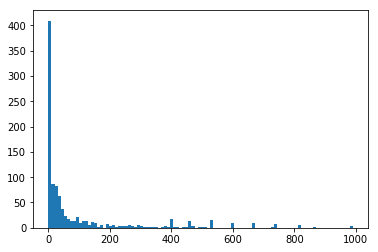

In [10]:
plt.hist(iteration_list,bins=num_iteration//10)
plt.show()

## Calculate Stats on how many times the experiment failed to find the win case

In [11]:
failed_exps =  num_iteration - sum(success_list)
print(f"The experiment failed {failed_exps} out of {num_iteration} Success Rate: {(1-(failed_exps/num_iteration))*100:.2f}%")

The experiment failed 81 out of 1000 Success Rate: 91.90%


In [12]:
# What was the maximum number of iterations required to find the correct winner?
max(iteration_list)

990